<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Analise_de_Dados_Adventure_Works_(dio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#Importando o arquivo do computador
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Importando o dataset do arquivo

df = pd.read_excel('/content/AdventureWorks.xlsx')

In [4]:
#Visualizando as 5 primeiras linhas do Dataset

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Verificando a quantidade de linhas e colunas que nosso dataset tem

df.shape

(904, 16)

In [6]:
#Verificando os tipos de dados

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#A função Describe gera todos as descrições estatisticas do dataset.
#A função possibilita que possamos observar diversos possiveis bias que nosso dataset venha ter como: Outlier, valores nulos
#Mas também possibilita que possas saber diversas informações de suma importancia no nosso dataset como:média, mediana, desvio padrão.
#A função describe pode nos fornecer diversos insights.

df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [8]:
#foi feito essa situação pois para poder manipular os dados e referencia as colunas fica mais pratico quando as colunas não tem nome maiusculo e espaço.

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.head(0)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor


In [10]:
#Verificando se a valores nulos no banco de dados

df.isnull().sum()

data_venda        0
data_envio        0
id_loja           0
id_produto        0
id_cliente        0
no._venda         0
custo_unitário    0
preço_unitário    0
quantidade        0
valor_desconto    0
valor_venda       0
produto           0
fabricante        0
marca             0
classe            0
cor               0
dtype: int64

In [11]:
#Verificando o produto com maior Valor de Venda

p_maior_vv = df.loc[df['valor_venda'] == df['valor_venda'].max()]['produto']

print(f'O produto com o maior valor de venda é o {p_maior_vv}')

O produto com o maior valor de venda é o 236    Fabrikam Trendsetter 2/3'' 17mm X100 Black
Name: produto, dtype: object


In [12]:
#Verificando a menor Valor de Venda

p_menor_vv = df.loc[df['valor_venda']== df['valor_venda'].min()]['produto']

print(f'O produto com o menor valor de venda é o {p_menor_vv}')

O produto com o menor valor de venda é o 286    Headphone Adapter for Contoso Phone E130 White
Name: produto, dtype: object


In [13]:
#Verificando a Receita Total

rt = df['valor_venda'].sum()
print(f'A receita total é de R$ {round(rt,2)}')

A receita total é de R$ 5984606.14


In [14]:
#Criando uma coluna para o Valor Custo Total

df['custo_total'] = df['custo_unitário'].mul(df.quantidade)

In [15]:
#Verificando o Custo Total

ct = df['custo_total'].sum()
print(f'O custo total para a fabricação dos produtos é de R$ {round(ct,2)}')

O custo total para a fabricação dos produtos é de R$ 2486783.05


In [16]:
df['lucro_total'] = df['valor_venda'].subtract(df['custo_total'])

In [17]:
#Verificando o Lucro Total
lt = rt - ct
print(f'O Lucro Total geral em toda essa medição é de R$ {round(lt,2)}')

O Lucro Total geral em toda essa medição é de R$ 3497823.09


In [18]:
lt_max = df['lucro_total'].max()

lt_max_prod = df.loc[df.lucro_total == df['lucro_total'].max()].produto

print(f'O produto que gerou mais lucro em uma de suas vendas foi o {lt_max_prod},sendo este o valor de R$ {lt_max}')


O produto que gerou mais lucro em uma de suas vendas foi o 236    Fabrikam Trendsetter 2/3'' 17mm X100 Black
Name: produto, dtype: object,sendo este o valor de R$ 19659.3


In [19]:
#Verificando linhas aleatorias do dataset

df.sample(10)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro_total
506,2009-06-22,2009-07-03,307,1226,19127,200906224CS717,330.99,999.00,7,699.30,6293.70,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2316.93,3976.77
379,2009-12-01,2009-12-08,199,1202,19023,200912014CS938,330.66,998.00,14,2794.40,11177.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4629.24,6548.36
210,2008-10-26,2008-10-31,199,1155,18881,200810264CS786,324.69,980.00,18,0.00,17640.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5844.42,11795.58
576,2008-06-21,2008-06-25,307,1178,19100,200806214CS596,330.66,998.00,8,798.40,7185.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,2645.28,4540.32
375,2008-11-29,2008-12-03,307,1203,19110,200811294CS656,324.69,980.00,14,2058.00,11662.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4545.66,7116.34
192,2008-04-09,2008-04-14,199,1155,18831,200804094CS597,324.69,980.00,12,0.00,11760.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3896.28,7863.72
288,2009-05-06,2009-05-10,199,2497,18940,200905065CS849,5.09,9.99,480,0.00,4795.20,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,2443.20,2352.00
545,2008-12-23,2008-12-27,306,384,19060,200812233CS676,348.58,758.00,4,606.40,2425.60,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,1394.32,1031.28
360,2008-02-04,2008-02-12,307,1203,19094,200802044CS549,324.69,980.00,16,3136.00,12544.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,5195.04,7348.96
498,2008-04-21,2008-04-26,306,366,19051,200804213CS567,348.58,758.00,7,371.42,4934.58,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,2440.06,2494.52


In [20]:
#Descobrindo quanto tempo levou para o envio dos produtos

df['tempo_para_envio'] = (df['data_envio'] - df['data_venda']).dt.days

In [21]:
df.sample(2)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro_total,tempo_para_envio
52,2008-05-26,2008-06-01,306,1202,19052,200805264CS576,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96,4004.04,6
542,2009-11-04,2009-11-14,306,1178,19076,200911044CS767,330.66,998.0,4,798.4,3193.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1322.64,1870.96,10


In [22]:
#Verificando o tempo médio de envio por Marca

df.groupby('marca')['tempo_para_envio'].mean()

marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_para_envio, dtype: float64

In [23]:
#Formatando o sistema para ficar com duas casas decimais

pd.options.display.float_format = '{:20,.2f}'.format

Text(0, 0.5, 'Marcas')

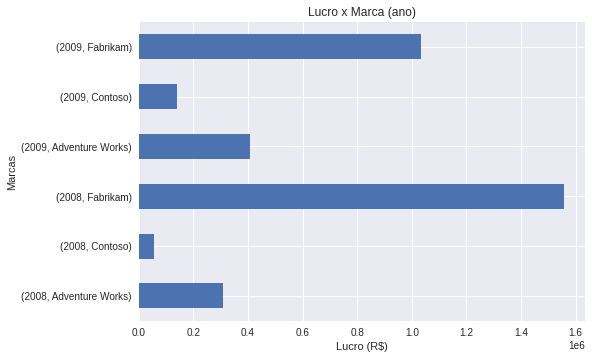

In [24]:
#Lucro das Marcas por Ano
df.groupby([df['data_venda'].dt.year,'marca'])['lucro_total'].sum().plot(kind='barh', title = 'Lucro x Marca (ano)')
plt.xlabel('Lucro (R$)')
plt.ylabel('Marcas')

In [25]:
#Lucro de cada Marca por mês em cada ano

df.groupby([df['data_venda'].dt.year,df['data_venda'].dt.month,'marca'])['lucro_total'].sum()

data_venda  data_venda  marca          
2008        1           Adventure Works              10,008.60
                        Fabrikam                     62,624.84
            2           Adventure Works              35,425.16
                        Fabrikam                    103,531.73
            3           Adventure Works              17,840.64
                                                  ...         
2009        11          Contoso                      13,508.26
                        Fabrikam                     88,392.89
            12          Adventure Works              26,047.30
                        Contoso                      16,136.91
                        Fabrikam                    100,146.32
Name: lucro_total, Length: 68, dtype: float64

Text(0.5, 0, 'Ano, Mês')

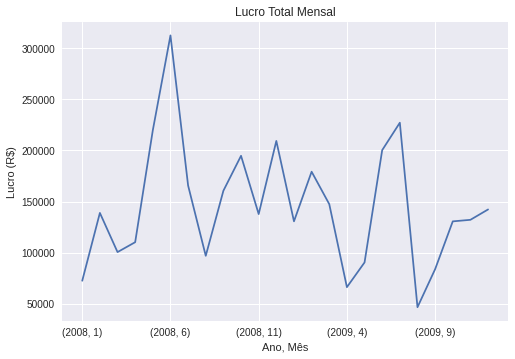

In [26]:
df.groupby([df['data_venda'].dt.year,df['data_venda'].dt.month])['lucro_total'].sum().plot(title = 'Lucro Total Mensal')
plt.ylabel('Lucro (R$)')
plt.xlabel('Ano, Mês')

Para a empresa o ano de 2008 foi ano bem lucrativo tendo seu lucro em sua maioria na crescente, chegando a ter a maior alta computada pelo sistema que foi no mês de Junho, já o ano de 2009 teve uma vairação muito grande dos lucros, tmabém chegando a seu menor valor que foi por volta de Agosto de 2009.

In [27]:
#Verificando o produto que mais vendeu em quantidade

df.groupby('produto')['quantidade'].sum().sort_values(ascending = False)

produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: quantidade, dtype: int64

Text(0.5, 0, 'Quantidade')

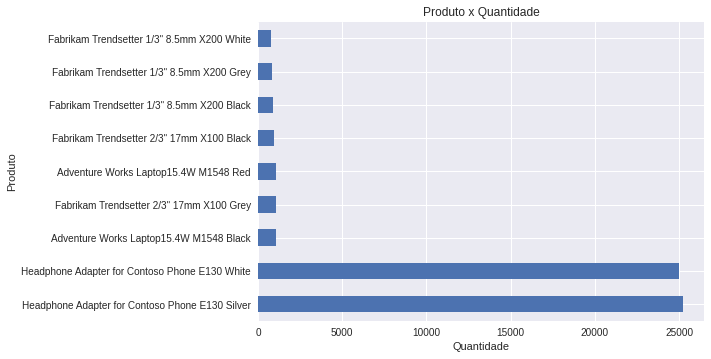

In [28]:
df.groupby('produto')['quantidade'].sum().sort_values(ascending = False).plot(kind='barh',title ='Produto x Quantidade')
plt.ylabel('Produto')
plt.xlabel('Quantidade')

In [30]:
df.groupby('produto')['lucro_total'].sum().sort_values(ascending = False)

produto
Fabrikam Trendsetter 2/3'' 17mm X100 Grey                   608,098.97
Fabrikam Trendsetter 2/3'' 17mm X100 Black                  520,733.86
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black                 507,214.23
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey                  501,926.50
Fabrikam Trendsetter 1/3'' 8.5mm X200 White                 453,138.34
Adventure Works Laptop15.4W M1548 Black                     367,185.56
Adventure Works Laptop15.4W M1548 Red                       344,850.68
Headphone Adapter for Contoso Phone E130 Silver              98,160.50
Headphone Adapter for Contoso Phone E130 White               96,514.45
Name: lucro_total, dtype: float64

Text(0.5, 0, 'Lucro (R$)')

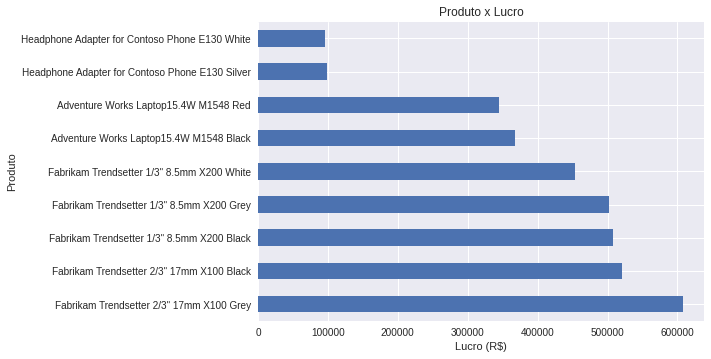

In [31]:
df.groupby('produto')['lucro_total'].sum().sort_values(ascending = False).plot(kind ='barh',title ='Produto x Lucro')
plt.ylabel('Produto')
plt.xlabel('Lucro (R$)')

Podemos observar com os gráficos acima que mesmo o Headphone Adapter for Contoso Phone E130 Silver sendo o que produto que mais vendeu, ele foi um dos que menos deu Lucro.

In [33]:
df.groupby('produto')['valor_venda'].max().sort_values(ascending = False)

produto
Fabrikam Trendsetter 2/3'' 17mm X100 Black                   29,400.00
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black                  25,174.80
Fabrikam Trendsetter 2/3'' 17mm X100 Grey                    25,088.00
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey                   23,952.00
Fabrikam Trendsetter 1/3'' 8.5mm X200 White                  21,347.22
Adventure Works Laptop15.4W M1548 Red                        19,404.80
Adventure Works Laptop15.4W M1548 Black                      19,329.00
Headphone Adapter for Contoso Phone E130 Silver              14,385.60
Headphone Adapter for Contoso Phone E130 White               13,246.74
Name: valor_venda, dtype: float64

Text(0.5, 0, 'Valor de Venda (R$)')

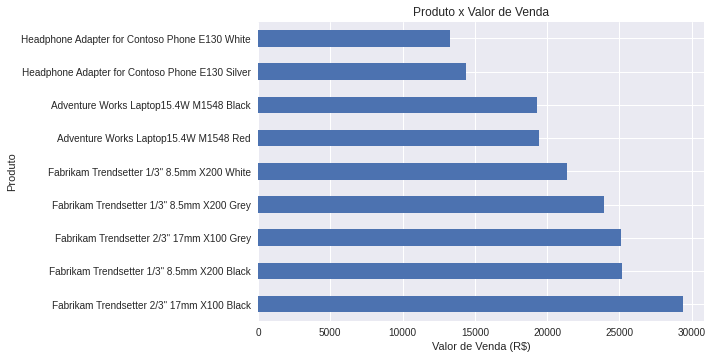

In [34]:
df.groupby('produto')['valor_venda'].max().sort_values(ascending = False).plot(kind='barh',title = 'Produto x Valor de Venda')
plt.ylabel('Produto')
plt.xlabel('Valor de Venda (R$)')

Com o gráfico acima podemos observar o por que o Headphone Adapter for Contoso Phone E130 Silver mesmo sendo o produto que mais vendeu não foi o mais lucro, pois o seu valor de venda é bem abaixo se comparado a outros prosuto com o Fabrikam Trendsetter 2/3'' 17mm X100 Grey que o produto mias lucrativo.


In [35]:
#Loja que mais vendeu

df.groupby('id_loja')['quantidade'].sum()

id_loja
199    20119
306    12215
307    24573
Name: quantidade, dtype: int64

In [36]:
#Loja com Maior Lucro

round(df.groupby('id_loja')['lucro_total'].sum(),2)

id_loja
199           1,294,718.51
306           1,016,493.12
307           1,186,611.46
Name: lucro_total, dtype: float64

Nessa situação podemos ver que a loja que mais vendeu foi realmente a que trouxe mais lucro entre as 3 listas.

In [37]:
#Produto mais vendido por Loja

df.groupby(['id_loja','produto'])['quantidade'].sum()

id_loja  produto                                        
199      Adventure Works Laptop15.4W M1548 Black              324
         Adventure Works Laptop15.4W M1548 Red                313
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          359
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           323
         Fabrikam Trendsetter 1/3'' 8.5mm X200 White          229
         Fabrikam Trendsetter 2/3'' 17mm X100 Black           433
         Fabrikam Trendsetter 2/3'' 17mm X100 Grey            407
         Headphone Adapter for Contoso Phone E130 Silver     7891
         Headphone Adapter for Contoso Phone E130 White      9840
306      Adventure Works Laptop15.4W M1548 Black              353
         Adventure Works Laptop15.4W M1548 Red                320
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          238
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           227
         Fabrikam Trendsetter 1/3'' 8.5mm X200 White          294
         Fabrikam T

Nessa tabela conseguimos ver com maior clareza que o Headphone Adapter for Contoso Phone E130 Silver foi o produto que mais vendeu em todas as lojas.

In [38]:
df.head(1)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo_total,lucro_total,tempo_para_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [39]:
df.groupby(['marca','cor'])['quantidade'].sum()

marca            cor   
Adventure Works  Black      1089
                 Red        1047
Contoso          Silver    25232
                 White     25008
Fabrikam         Black      1810
                 Grey       1932
                 White       789
Name: quantidade, dtype: int64

Novamente sendo puxado pela grande venda dos headphones, as cores white e silver da marca contoso foram as cores mais vendidas entre os produtos.

In [40]:
df['id_cliente'].value_counts()

19060    27
19094    22
19057    22
19052    21
19053    18
         ..
18949     1
18937     1
19025     1
18946     1
18867     1
Name: id_cliente, Length: 168, dtype: int64

In [49]:
count = pd.DataFrame(data = df['id_cliente'].value_counts())
count.head()

,id_cliente
19060,27
19094,22
19057,22
19052,21
19053,18


In [52]:
count.value_counts()

id_cliente
2             34
3             27
1             26
4             19
6              9
9              8
14             7
10             7
5              7
7              5
11             4
15             3
16             3
8              2
13             2
22             2
18             1
21             1
27             1
dtype: int64

Podemos observar que apenas 26 clientes do 168 cadastrados no sistema voltaram somente uma vez. Isso mostrar boa qualiade de atendimento dos vendedores. É um valor muito baixo se comparado ao sistema por um todo SIM, mas pode ser mehlorado para diminuir essa quantidade de clientes que só foram uma vez

# **Conclusão**

  Para a analise desse dataset foi necessario fazer algumas modificações sutis nele para que facilitasse todo o desenvolvimento do projeto. Foi possivel perceber que no dataset não se tinha valores nulos mas que foi encontrado um outlier no tempo de envio. Foram feitas novas colunas para ajudar ainda mais na interpretação do dataset e chegou-se a conclusão de:
  
  A loja teve muito seus altos e baixos em relação ao Lucro Total, sendo o mês de Junho de 2008 sua maior alta nos lucros. O lucro total alcançado pela empresa foi de R$ 3497823.09.

  A analise nos mostrou que o produto que mais vendeu, não foi aquele que deu o maior lucro a empresa e isso se deu devido ao seu valor ser bem inferior aos outros produtos vendidos na loja. A marca Fabrikan foi aquele que trouxe mais lucro para a empresa com seus produtos, mas a marca Contoso foi a que vendeu mais produtos no quesito quantidade.

  Levando em consideração tempo de envio, as marcas pertencentes a empresa tem uma média de 8-9 dias para entregar os seus produtos, só tivemos um problema com uma das entregas que demorou 20 dias, mas como não tivemos mais informações sobre o caso iremo levar em consideração que foi erro de logistica da Marca.